<a href="https://colab.research.google.com/github/amykimkim/claims-analysis/blob/main/Claims_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Data Loading and Exploration

The three claims files was loaded into dataframes uisng Python libraries (Pandas, seaborn, matplotlib)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
## Loading in the data and printing shape (rows and columns)

# Header - 388 rows, 9 columns
df_header = pd.read_csv('/content/STONYBRK_20240531_HEADER.csv')
df_header.shape
print(df_header.shape)

# Line - 520 rows, 28 columns
df_line = pd.read_csv('/content/STONYBRK_20240531_LINE.csv')
df_line.shape
print(df_line.shape)

# Code - 1536 rows, 9 columns
df_code = pd.read_csv('/content/STONYBRK_20240531_CODE.csv')
df_code.shape
print(df_code.shape)


(388, 43)
(520, 28)
(1536, 9)


In [ ]:
## Printing first five rows of each claim file

df_header.head(5)
df_line.head(5)
df_code.head(5)

,ClientId,ProspectiveClaimId,CodeQualifier,CodePos,CodeValue,CodeFromDate,CodeToDate,CodeAmnt,POAInd
0,49,36752505,ABF,3,G93.6,NaN,NaN,NaN,NaN
1,49,36819490,ABF,4,N17.9,NaN,NaN,NaN,NaN
2,49,35352862,ABF,2,G06.1,NaN,NaN,NaN,NaN
3,49,35244774,ABF,10,G90.8,NaN,NaN,NaN,NaN
4,49,36745815,ABK,1,I77.819,NaN,NaN,NaN,NaN


In [ ]:
## Seeing how many unique claims there are in each file

print("Unique claims in HEADER:", df_header['ProspectiveClaimId'].nunique())
print("Unique claims in LINE:", df_line['ProspectiveClaimId'].nunique())
print("Unique claims in CODE:", df_code['ProspectiveClaimId'].nunique())

Unique claims in HEADER: 388
Unique claims in LINE: 388
Unique claims in CODE: 388


In [ ]:
## Analyzing earliest 'ServiceFromDate' to latest 'ServiceFromDate'

df_header['ServiceFromDate'] = pd.to_datetime(df_header['ServiceFromDate'], format="%Y-%m-%d", errors='coerce')
df_header['ServiceToDate']   = pd.to_datetime(df_header['ServiceToDate'], format="%Y-%m-%d", errors='coerce')
df_header['ServiceFromDate'].min(), df_header['ServiceFromDate'].max()

(Timestamp('2023-09-25 00:00:00'), Timestamp('2024-05-29 00:00:00'))

In [ ]:
## Determining how many lines per claim

lines_per_claim = df_line.groupby('ProspectiveClaimId').size()
lines_per_claim.mean()

np.float64(1.3402061855670102)

In [ ]:
## Determining diagnoses per claim

diagnosis_per_claim = df_code.groupby('ProspectiveClaimId').size()
diagnosis_per_claim.mean()

np.float64(3.9587628865979383)

# Part 2: Relational Data Analysis

BillingProviderNPI  BillingProvFirstName               
1821035601          SB INTERNISTS                          152
1063468536          SB SURGICAL ASSOCIATES                  81
1154376309          NEW YORK SPINE AND BRAIN SURGERY        69
1538114723          UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY     40
1437105905          SB PSYCHIATRIC ASSOCIATES               36
dtype: int64


<Axes: xlabel='BillingProviderNPI'>

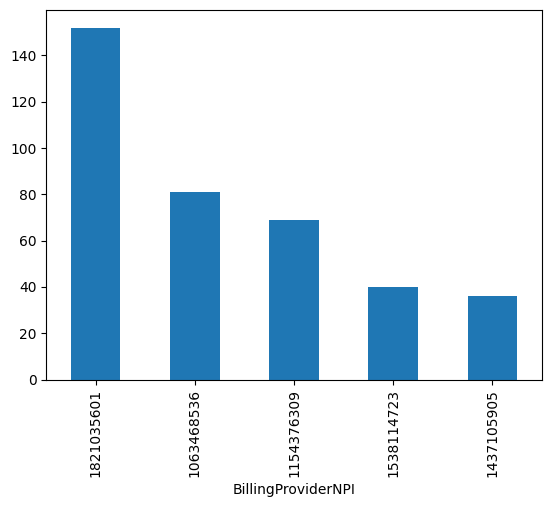

In [ ]:
# Question 1: Provider Analysis

## Who are the top 5 billing providers by number of claims?
providers = df_header.groupby('BillingProviderNPI')['ProspectiveClaimId'].nunique()
providers.sort_values(ascending=False).head(5)


## Display: Provider name, NPI, and claim count
provider_name = (df_header.groupby(['BillingProviderNPI', 'BillingProvFirstName'])
    .size()
    .sort_values(ascending=False)
    .head(5)
)
print(provider_name)

providers.sort_values(ascending=False).head(5).plot(kind='bar')

Question 1 interpretation: NPI (1821035601) AKA (SB INTERNISTS) had the highest number of claims. Followed by SB Surgical associates, New York spine and brain surgery, univ. assoc in OBGYN, and SB psychiatric associates.

PrimaryPayerName
MEDICARE                      242
HEALTHFIRST FFS                46
FIDELIS/BETTER HEALTH PLAN     26
HIP MEDICAID                   17
HEALTHFIRST CAPITATED          10
Name: ProspectiveClaimId, dtype: int64
PrimaryPayerName
MEDICARE                      0.623711
HEALTHFIRST FFS               0.118557
FIDELIS/BETTER HEALTH PLAN    0.067010
HIP MEDICAID                  0.043814
HEALTHFIRST CAPITATED         0.025773
Name: ProspectiveClaimId, dtype: float64


<Axes: xlabel='PrimaryPayerName'>

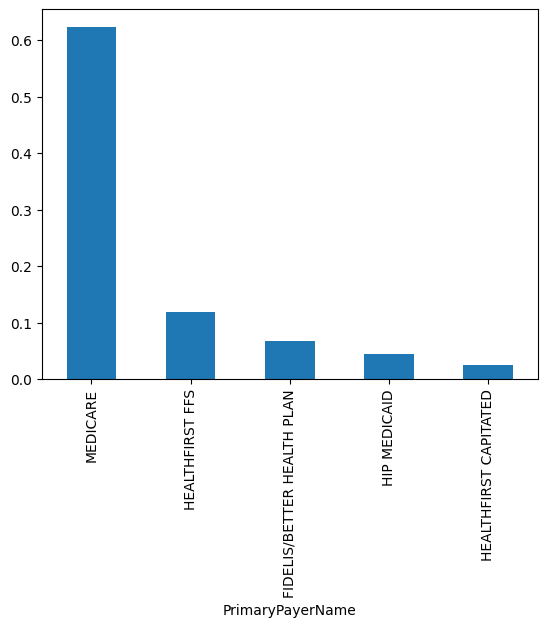

In [ ]:
# Question 2: Payer Mix Analysis

##What are the top 5 primary payers by claim volume?
payer = df_header.groupby('PrimaryPayerName')['ProspectiveClaimId'].nunique()
print(payer.sort_values(ascending=False).head(5))

##Calculate the percentage of total claims for each payer
payer_percentage = payer / payer.sum()
payer_percentage.sort_values(ascending=False).head(5)
print(payer_percentage.sort_values(ascending=False).head(5))

##bar chart showing payer distribution
payer_percentage.sort_values(ascending=False).head(5).plot(kind='bar')

Question 2 interpretation: The top five payer by claim volume are the following: Medicare(62%), Healthfirst FFS (12%), Fidelis/better health plan (7), HIP medicaid (4%), and Healthfirst capitated (3%)

In [ ]:
# Question 3: Common Diagnoses

##What are the 10 most frequently appearing diagnosis codes (CodeValue)?
ICD_10_count = df['CodeValue'].nunique()
print(f"Number of unique ICD_10 Codes: {ICD_10_count}")

ICD_10_freq = df['CodeValue'].value_counts()
ICD_10_freq.head(10)


Number of unique ICD_10 Codes: 489


,count
CodeValue,
J96.01,62
I10,49
E78.5,49
G93.5,34
D64.9,29
I25.10,27
I61.9,26
I48.91,24
I60.8,24


Question 3 interpretation: The top 10 frequently appearing diagnosis codes were generated, with the top ICD-10 code representing J96.01 acute respiratory failure with hypoxia, E78.5 Hyperlipidemia, and I10 Essential hypertension.

HCPCS  ClientProcedureName                                                       
99291  CRITICAL CARE, INITIAL FIRST HOUR                                             68
99222   INITIAL HOSPITAL CARE PER DAY FOR THE E&M OF A PATIENT;LEVEL 2               30
99233  SUBSEQ. HOSP CARE DETAILED INTERVAL HX,EX,HIGH COMPLEXITY DECISION            27
99223  INITIAL  HOSPITAL CARE PER DAY,FOR THE E&M OF A PATIENT;LEVEL 3               24
99213  OFFICE/OUTPATIENT VISIT,ESTABL.PT,EXPANDED HX,EXAM,LOW COMPLEXITY DECISION    19
99233  SUBSEQUENT HOSP. CARE,PER DAY,FOR THE E&M OF A PATIENT;LEVEL 3                18
90833  PSYCHOTHERAPY WITH AN E&M SERVICE,30 MINS,PATIENT AND/OR FAMILY               16
99213  OFFICE/OUTPATIENT VISIT FOR  E&M OF ESTAB PATIENT;LEVEL 3                     15
92557  COMPREHENSIVE AUDIOMETRY THRESHOLD EVALUATION; SPEECH RECOGNITION             14
99442  TELEPHONE SERVICES MD/NPP;11-20 MINUTES......                                 13
dtype: int64


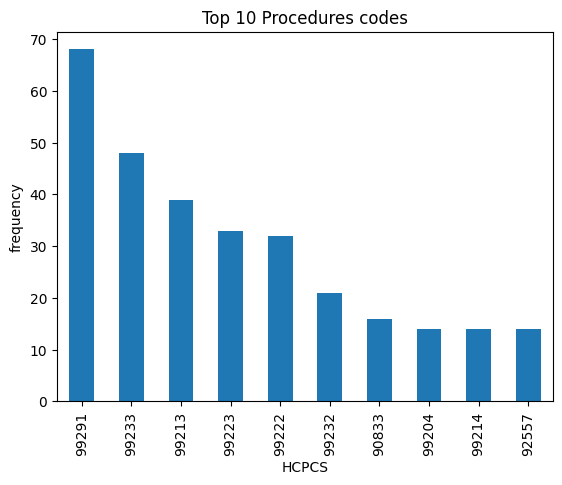

In [28]:
# Question 4: Common Procedures

## What are the 10 most frequently billed procedure codes (HCPCS)?
## Display: HCPCS code, description (if available in data), and frequency
df_HCPCS_freq = df_line['HCPCS'].value_counts()
df_HCPCS_freq.head(10)
#Create a bar chart showing the top 10 procedures (without procedure name)
df_HCPCS_freq.head(10).plot(kind='bar')
plt.ylabel('frequency')
plt.xlabel('HCPCS')
plt.title('Top 10 Procedures codes')

df_HCPCS = (df_line.groupby(['HCPCS','ClientProcedureName'])
    .size()
    .sort_values(ascending=False)
    .head(10)
)
print(df_HCPCS)



Question 4 Interpretation: The most commonly performed procedure according to the HCPCS data was 99291 (CRITICAL CARE, INITIAL FIRST HOUR  ) with a count of 68. This was followed by code 99222 (INITIAL HOSPITAL CARE PER DAY FOR THE E&M OF A PATIENT;LEVEL 2) and code 99233 (SUBSEQ. HOSP CARE DETAILED INTERVAL HX,EX,HIGH COMPLEXITY DECISION).

In [32]:
# Question 5: Service Location Analysis
## How many claims were submitted for each PlaceOfService?
claims = df_line.groupby('PlaceOfService')['ProspectiveClaimId'].nunique()
print(claims.sort_values(ascending=False).head(5))

## What percentage of claims are for "INPATIENT" vs "DOCTOR'S OFFICE"?
claims_percent = df_header['PlaceOfService'].value_counts(normalize=True) * 100
print(claims_percent)

PlaceOfService
21    231
11    132
22     24
23      1
Name: ProspectiveClaimId, dtype: int64
PlaceOfService
21    59.536082
11    34.020619
22     6.185567
23     0.257732
Name: proportion, dtype: float64


Question 5 Analysis:

  Place of service

*   11 = Office
*   21 = Inpatient hospital
*   22 = Outpatient Hospital
*   23 = Emergency Room

60% of services took place in inpatient hospitals, 34% of services took place in offices, 6.2% of services took place in outpatient hospitals, and 0.25% of services took place in emergency rooms.




# Part 3: Advanced Analysis with Joins

In [43]:
# Question 6: Claims with High Service Line Counts

## Merge the HEADER and LINE files
df_claims = df_header.merge(
    df_line,
    on=['ClientId', 'ProspectiveClaimId'],
    how='left'
)

## Calculate the total number of service lines per claim
line_counts = (
    df_claims.groupby('ProspectiveClaimId')['LinePos']
    .nunique()
)

## Identify claims with 5 or more service lines
high_line_claims = line_counts[line_counts >= 5]
print(high_line_claims)

## Display: ClaimId, Provider name, number of lines, and total charges
charges_per_claim = (
    df_claims.groupby('ProspectiveClaimId')['Charges']
    .sum()
)

provider_name_per_claim = (
    df_claims.groupby('ProspectiveClaimId')['BillingProvFirstName']
    .first()
)

claims_high_service = pd.DataFrame({
    'NumberServiceLines': high_line_claims,
    'TotalCharges': charges_per_claim.loc[high_line_claims.index],
    'BillingProvider': provider_name_per_claim.loc[high_line_claims.index]
})

claims_high_service.sort_values('NumberServiceLines', ascending=False).head(10)

ProspectiveClaimId
36668119    6
36710175    5
36740402    6
36757684    5
36794825    7
Name: LinePos, dtype: int64


,NumberServiceLines,TotalCharges,BillingProvider
ProspectiveClaimId,,,
36794825,7,1163,SB CHILDREN'S SERVICE
36668119,6,1030,UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY
36740402,6,945,UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY
36710175,5,873,UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY
36757684,5,873,UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY


In [46]:
# Question 7: Diagnosis-Procedure Combinations

## Create a merged dataset linking claims to both procedures and diagnoses
df_claims = df_claims.merge(
    df_code,
    on=['ClientId', 'ProspectiveClaimId'],
    how='left'
)


## Find the most common diagnosis code (CodeValue) associated with CPT code 99291
df_99291 = df_claims[df_claims['HCPCS'] == '99291']
dx_counts_99291 = (
    df_99291['CodeValue']
    .value_counts()
    .head(10)
)

dx_counts_99291

,count
CodeValue,
J96.01,4991
G93.5,3709
E78.5,3206
I60.8,2837
I61.9,2830
D64.9,2685
I67.848,2253
I10,2068
G93.6,1860


Question 7 Analysis: The top CodeValues associated with the HCPCS 99291 (first 30 to 74 minutes of critical care) was
* J96.01	Acute respiratory failure with hypoxia
* G93.5 Cerebral edema
* E78.5	Hyperlipidemia, unspecified

In [63]:
# Question 8: Charges by Payer

## Merge HEADER and LINE files
df_claims = df_header.merge(
    df_line,
    on=['ClientId', 'ProspectiveClaimId'],
    how='left'
)

## Calculate total charges (sum of all line charges) per claim
charges_per_claim = (
    df_claims.groupby('ProspectiveClaimId')['Charges']
    .sum()
)

charges_per_claim

## Group by PrimaryPayerName and calculate:
primary_payer_name = (
    df_claims.groupby('PrimaryPayerName')['Charges']
    .sum()
)

## Total charges
primary_payer_name
print(primary_payer_name)

## Average charges per claim
primary_payer_name.mean()
print(f'Average charges per claim: {primary_payer_name.mean()}')

## Number of claims
primary_payer_name.count()
print(f'Number of claims: {primary_payer_name.count()}')

## Sort by total charges descending and display top 10 payers
total_charges = (
    df_claims.groupby('PrimaryPayerName')['Charges']
    .sum()
    .sort_values(ascending=False)
)
total_charges.head(10)

PrimaryPayerName
AETNA                                       6930
AETNA MEDICARE                              2310
BLUES EXCHANGE                              1155
CIGNA HMO                                   2310
DIRECT SELF PAY                             6575
EMPIRE BLUE HMO                             1155
EMPIRE BLUE PPO                             2310
EMPIRE BLUE SR                              4620
FIDELIS CAPITATED                           2785
FIDELIS/BETTER HEALTH PLAN                 10810
HEALTHFIRST CAPITATED                       4905
HEALTHFIRST ESSENTIAL                       1155
HEALTHFIRST FFS                            29794
HEALTHFIRST INCREASED BENEFIT PLAN HMO      1155
HIP MEDICAID                               10014
MAGNACARE                                   3465
MEDICAID EMERGENT SERVICES                  2310
MEDICARE                                  131008
MEDICARE:COORDINATED CARE PLAN              1155
MMIS                                        2310
TRI

,Charges
PrimaryPayerName,
MEDICARE,131008
HEALTHFIRST FFS,29794
FIDELIS/BETTER HEALTH PLAN,10810
HIP MEDICAID,10014
AETNA,6930
DIRECT SELF PAY,6575
UNITED COMMUNITY PLAN GOVT PROGRAM,5175
HEALTHFIRST CAPITATED,4905
EMPIRE BLUE SR,4620


# Part 4: Creative Analysis

In [ ]:
# Question 9: Your Own Analysis

# Question: What are the top 5 ICD-10 codes (CodeValue) that have the highest charges?

In [4]:
df_merged_claims = pd.merge(df_line, df_code, on=['ClientId', 'ProspectiveClaimId'], how='left')
print(df_merged_claims.head())

   ClientId  ProspectiveClaimId  LinePos  RevCode  HCPCS Modifier1 Modifier2  \
0        49            35216986        1      NaN  99291        GC        25   
1        49            35216986        1      NaN  99291        GC        25   
2        49            35216986        1      NaN  99291        GC        25   
3        49            35216986        1      NaN  99291        GC        25   
4        49            35216986        1      NaN  99291        GC        25   

   Modifier3  Modifier4            DxMapDelim  ...  CodeName  \
0        NaN        NaN  1,2,3,4,5,6,7,8,9,10  ...     TESNJ   
1        NaN        NaN  1,2,3,4,5,6,7,8,9,10  ...     TESNJ   
2        NaN        NaN  1,2,3,4,5,6,7,8,9,10  ...     TESNJ   
3        NaN        NaN  1,2,3,4,5,6,7,8,9,10  ...     TESNJ   
4        NaN        NaN  1,2,3,4,5,6,7,8,9,10  ...     TESNJ   

   ClientProcedureCode                ClientProcedureName  CodeQualifier  \
0              9699291  CRITICAL CARE, INITIAL FIRST HOUR 

In [5]:
total_charges_by_diagnosis = df_merged_claims.groupby('CodeValue')['Charges'].sum().sort_values(ascending=False)
top_5_diagnoses = total_charges_by_diagnosis.head(5)
print("Top 5 ICD-10 codes by total charges:")
print(top_5_diagnoses)

Top 5 ICD-10 codes by total charges:
CodeValue
J96.01    64865
E78.5     45150
G93.5     39870
I10       37990
I61.9     30630
Name: Charges, dtype: int64


/tmp/ipython-input-2912968171.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_diagnoses.index, y=top_5_diagnoses.values, palette='viridis')


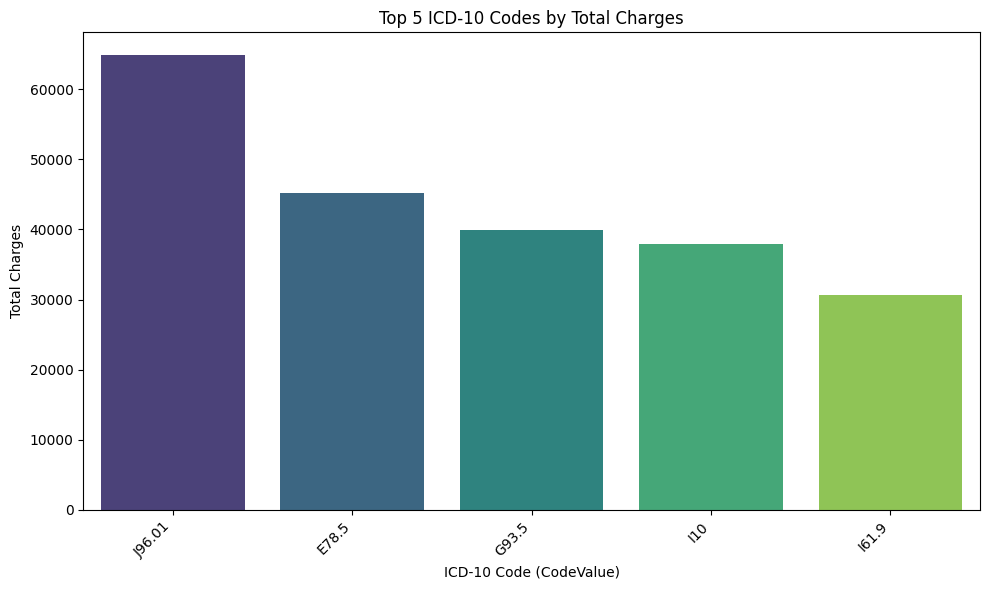

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_diagnoses.index, y=top_5_diagnoses.values, palette='viridis')
plt.title('Top 5 ICD-10 Codes by Total Charges')
plt.xlabel('ICD-10 Code (CodeValue)')
plt.ylabel('Total Charges')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

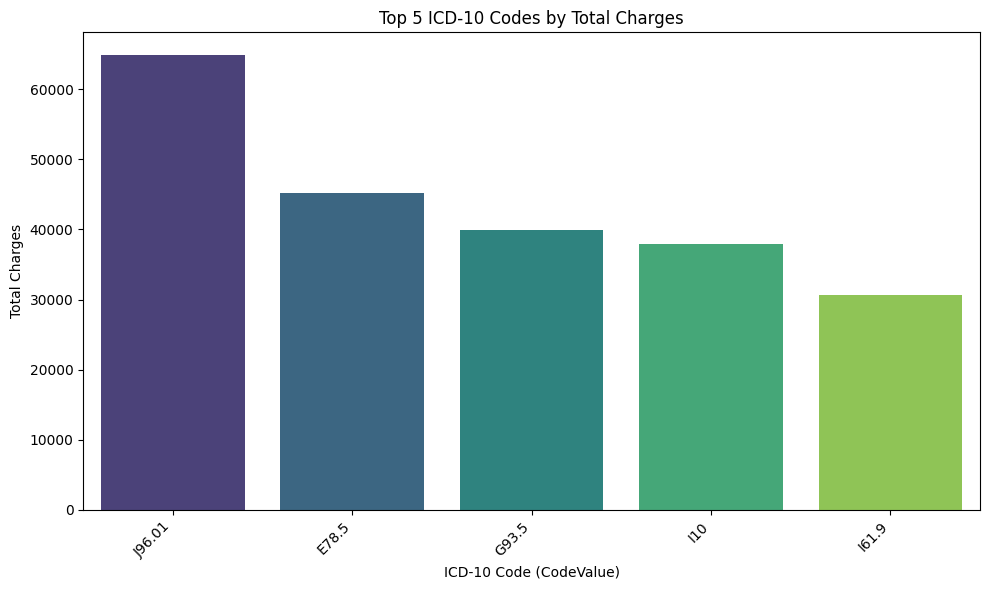

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_diagnoses.index, y=top_5_diagnoses.values, hue=top_5_diagnoses.index, palette='viridis', legend=False)
plt.title('Top 5 ICD-10 Codes by Total Charges')
plt.xlabel('ICD-10 Code (CodeValue)')
plt.ylabel('Total Charges')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Question 8 Analysis: The top 5 CodeValues associated with the highest total charges were

1.   J96.01	Acute respiratory failure with hypoxia  $64,865

2.   E78.5 Hyperlipidemia, unspecified  $45,150

3.   G93.5 Cerebral edema  $39,870

4. I10 Essential aka primary hypertension  $37,990

5. I61.9 nontraumatic intracerebral hemorrhage, unspecified $30,630


Further investigation into each code value to see what additional drivers make the length of stay or cost go up with help the organization come up with a plan to attempt to decrease costs



